<a href="https://colab.research.google.com/github/felipenaito/data_science/blob/master/Analisando_os_Dados_do_Airbnb_Floren%C3%A7a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Florença, Itália*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Florença, na Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados utilizados foram adquiridos no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para a análise em questão, apenas o seguinte arquivo será utilizado:

* `listings.csv` - *Summary information and metrics for listings in Florence (good for visualisations).*

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importar o arquivo listings.csv para um DataFrame (df)
df = pd.read_csv("http://data.insideairbnb.com/italy/toscana/florence/2020-04-30/visualisations/listings.csv")

## Análise dos Dados

Agora, iremos criar uma estrutura inicial para entendimento de que tipos de informações estão disponíveis nesse arquivo. Em seguida, iniciaremos a análise, de fato.


**Dicionário das variáveis**


* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias


Antes de iniciar qualquer análise, vamos dar uma olhada geral no nosso dataset. O comando .head() para verificar as 5 primeiras linhas e o comando .shape para entendermos a forma de nossa base, ou seja, quantas linhas e colunas.

In [8]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,24469,Fortezza/City Centre Modern Apt 2+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78308,11.24418,Entire home/apt,80,2,1,2019-09-27,0.14,5,342
1,24470,Fortezza/City Centre Modern Apt 2+1,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78287,11.24431,Entire home/apt,75,2,3,2019-04-21,0.03,5,353
2,24471,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78292,11.24460,Entire home/apt,135,2,0,NaN,NaN,5,348
3,24472,Fortezza/City Centre Modern Apt 4+2,99178,Benedetta And Lorenzo,NaN,Centro Storico,43.78150,11.24507,Entire home/apt,120,2,2,2012-04-11,0.02,5,352
4,24807,Beautiful Apartment Florence & WIFI,68490,Alberto,NaN,Campo di Marte,43.77813,11.29202,Entire home/apt,51,2,348,2019-09-13,2.86,1,361


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Em outras palavras, vamos entender quantas linhas e colunas nosso dataset possui. Cada linha é uma entrada, observação ou registro de oferta de residência. Enquanto cada coluna é um atributo ou variável.

In [21]:
# identificar o volume de dados do DataFrame

print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)


Entradas:	 12256
Variáveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Ao utilizar uma base de dados, ou um dataset, é importante saber qual a relevância de cada coluna. Um jeito de se verificar isso, é identificar quantos valores nulos ou ausentes existem em uma determinada coluna. Com isso, pode-se observar que:
* `neighbourhood_group` tem todas as linhas vazias (100%)
* `reviews_per_month` e `last_review` tem 16.5% de valores vazios
* `name` possui uma pequena parcela de valores vazios (0,02%)

In [26]:
# ordenar em ordem decrescente as variáveis por seus valores relativos ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) 

neighbourhood_group               1.000000
reviews_per_month                 0.165878
last_review                       0.165878
name                              0.000245
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para uma primeira olhada na distribuição das variáveis, utilizaremos um histograma por variável.

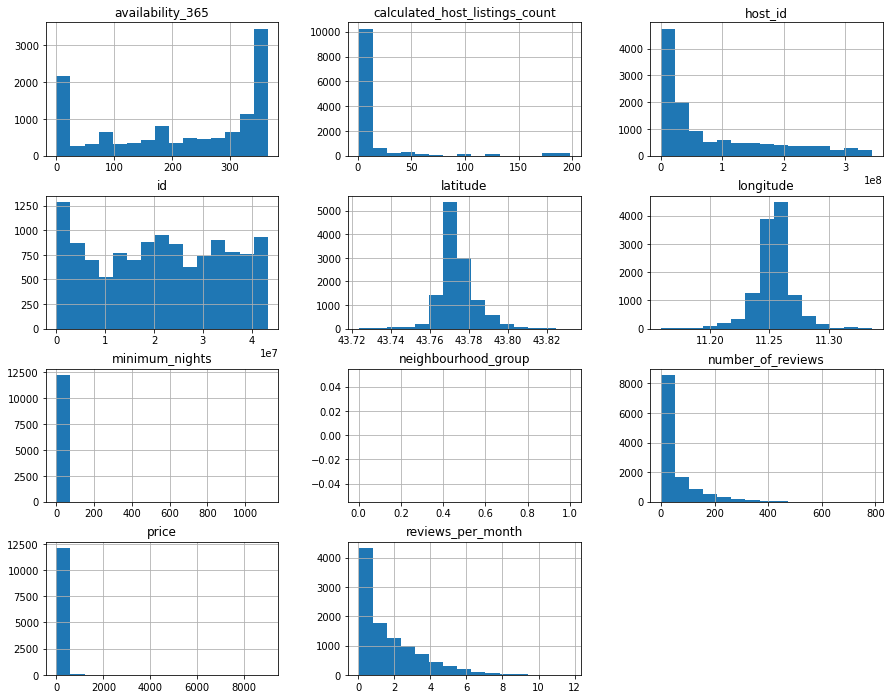

In [30]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,12));


### **Q4. Qual a média e mediana dos preços de aluguel?**

Com o valor médio de preços de aluguel, conseguimos ter uma idéia do valor central para Florença. No entanto, considerando-se que possam existir outliers, consideraremos também o valor da mediana.
Com isso, podemos ver indícios de outliers que puxam a média para valores maiores do que a mediana (111 > 80)

In [33]:
# ver a média da coluna `price``
df.price.mean()


111.0082408616188

In [34]:
# ver a mediana da coluna 'price'
df.price.median()

80.0

### **Q4. Qual a correlação existente entre as variáveis**

A correlação nos ajuda a entender a relação entre as variáveis do dataset. 
* Quanto maior a relação, mais próximo de 1 será o valor. 
* Quanto menor, mais próximo de 0 será o valor.
* Se positivo, sugere uma correlação em mesma direção.
* Se negativo, sugere uma correlação inversa (quanto maior um, menor o outro).



> **Iremos verificar as correlações a partir de 2 modos:**


* uma matriz de correlação
* um heatmap (mapa de calor)

In [35]:
# criar uma matriz de correlação e filtrar apenas colunas quantitativas relevantes.
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.036034,-0.098348,-0.095588,0.037377,0.072465
minimum_nights,0.036034,1.000000,-0.025872,-0.038554,-0.005992,0.012119
number_of_reviews,-0.098348,-0.025872,1.000000,0.781604,-0.112820,0.086763
reviews_per_month,-0.095588,-0.038554,0.781604,1.000000,-0.143638,0.054802
calculated_host_listings_count,0.037377,-0.005992,-0.112820,-0.143638,1.000000,-0.049487
availability_365,0.072465,0.012119,0.086763,0.054802,-0.049487,1.000000


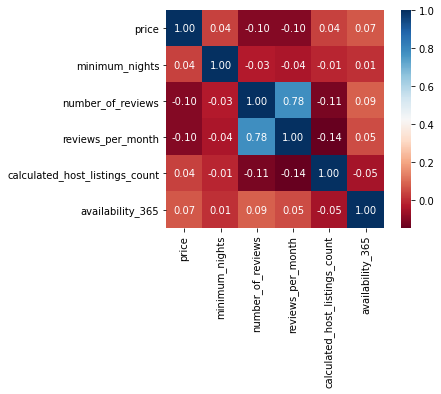

In [37]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Olhando a tabela acima, nota-se que para a variável preço, por exemplo, não houve nenhuma correlação que fosse fortemente significante para nossa análise. 

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb em Florença?**

Para ver os diferentes tipos de imóveis classificados no nosso dataset, temos a variável `room_type` com as opções de quarto.
Para entender qual tipo é mais alugado, faremos uma contagem por tipo e depois uma proporção em porcentagem.

In [38]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    9400
Private room       2524
Hotel room          280
Shared room          52
Name: room_type, dtype: int64

In [39]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts() / df.shape[0]

Entire home/apt    0.766971
Private room       0.205940
Hotel room         0.022846
Shared room        0.004243
Name: room_type, dtype: float64

Com isso notamos que a grande maioria das ofertas são de casas ou apartamentos inteiros (aproximadamente **76,7%**).

### **Q6. Qual a localidade mais cara do dataset?**
É interessante também identificarmos as regiões mais caras no dataset. Onde seria mais caro de se ficar em Florença?
Para isso, utilizaremos a função `groupby()` com a variável `neighbourhood` para agruparmos por bairros. Com isso, olharemos as médias de preços.


In [43]:
# ver preços por bairros, na média
df.groupby('neighbourhood').price.mean().sort_values(ascending=False)


neighbourhood
Gavinana Galluzzo    133.288981
Centro Storico       118.298153
Campo di Marte        88.717647
Rifredi               85.104024
Isolotto Legnaia      72.481685
Name: price, dtype: float64

In [46]:
#representatividade de quantidade de ofertas em cada bairro
df.neighbourhood.value_counts() / df.shape[0]

Centro Storico       0.729031
Campo di Marte       0.104031
Rifredi              0.083143
Isolotto Legnaia     0.044550
Gavinana Galluzzo    0.039246
Name: neighbourhood, dtype: float64

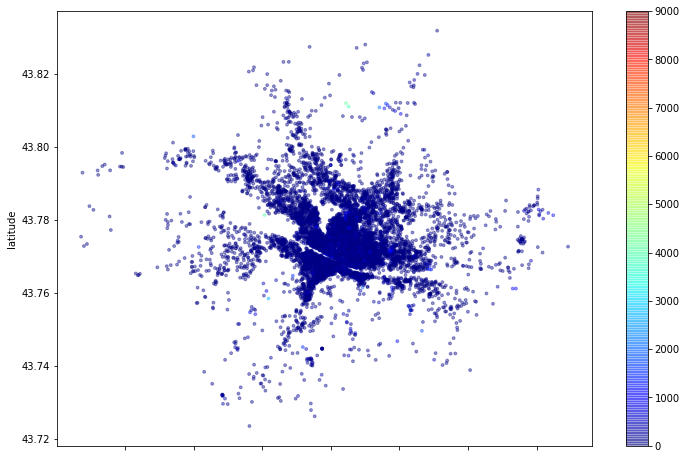

In [41]:
# plotar os imóveis pela latitude-longitude
df.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
Em média, quanto tempo é exigido que se fique hospedado em Florença? Esse é um dado relevante que varia de acordo com o que o dono do local acha interessante para o rendimento da atividade.

In [47]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

3.127039817232376

## Conclusões


Foi feita uma análise exploratória inicial para se ter uma ideia de que tipo de variáveis estão presentes no dataset. Há alguns pontos a serem abordados como outliers que podem gerar diferenças nas análises. 

Outro ponto relevante é a maior concentração de ofertas em certos bairros. 

Contudo, é um bom início e para maior aprofundamento, recomenda-se utilizar o dataset completo com todos os 106 atributos também disponível no mesmo site que citei no início desse arquivo.